# Load Libraries and Data for MNIST 784

In [ ]:
# Import required libraries
import time
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Flatten
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
# Plotting the training history (optional)
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

# Load MNIST dataset from sklearn
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
tf.config.threading.get_intra_op_parallelism_threads()

0

In [ ]:
print("Number of CPUs available:", os.cpu_count())

Number of CPUs available: 2


4 threads (2 CPUs × 2 threads per CPU) will be used during model training.

# Data Processing

In [ ]:
X = mnist.data.astype('float64') / 255.0  # Normalize pixel values to [0, 1]
y = mnist.target.astype('float64')

# One-hot encode the labels
lb = LabelBinarizer()
y1 = lb.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)


# Building Model and Training

In [ ]:
# Define the MLP model
model = Sequential([
    Input(shape=(784,)),            # Explicit input layer
    Flatten(),                      # Flatten layer to handle input data
    Dense(128, activation='sigmoid'),  # Hidden layer with 128 neurons
    Dense(64, activation='sigmoid'),   # Hidden layer with 64 neurons
    Dense(10, activation='sigmoid') # Output layer with 10 classes
])

# Compile the model using SGD with a specified learning rate
model.compile(optimizer=SGD(learning_rate=0.001),  # Set learning rate explicitly
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
start_time = time.time()  # Record the start time

history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

end_time = time.time()    # Record the end time
# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for model.fit(): {elapsed_time:.2f} seconds")

Epoch 1/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0839 - loss: 2.4178 - val_accuracy: 0.1169 - val_loss: 2.3066
Epoch 2/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1221 - loss: 2.3022 - val_accuracy: 0.1327 - val_loss: 2.2925
Epoch 3/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1262 - loss: 2.2908 - val_accuracy: 0.1259 - val_loss: 2.2841
Epoch 4/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1250 - loss: 2.2817 - val_accuracy: 0.1423 - val_loss: 2.2756
Epoch 5/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1539 - loss: 2.2741 - val_accuracy: 0.1651 - val_loss: 2.2670
Epoch 6/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1819 - loss: 2.2657 - val_accuracy: 0.1942 - val_loss: 2.2583
Epoch 7/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2180 - loss: 2.2565 - val_accuracy: 0.2396 - val_loss: 2.2493
Epoch 8/15
875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2492 - loss: 2.2475 - val_accuracy: 0.

# Evaluation

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 52.95%


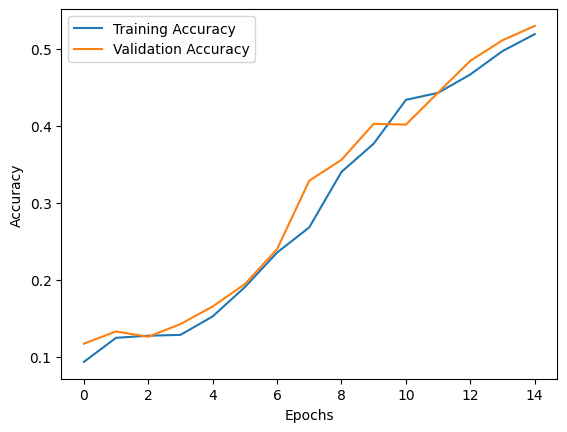

In [ ]:


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save Data in text format to use in C
Here is just about saving data into text format where reading function in C works to read the data.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Convert X and y to numpy arrays
X = np.array(X, dtype=int)
y = np.array(y, dtype=int)  # Convert y to integers

# Create a one-hot encoded matrix for y
num_classes = 10
y_one_hot = np.zeros((y.shape[0], num_classes), dtype=int)

y_one_hot[np.arange(y.shape[0]), y] = 1

# Concatenate X and the one-hot encoded y
data = np.hstack((X, y_one_hot))

# Verify the shape and content
print("Shape of the data array:", data.shape)
# print("Sample row from the data array:", data[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of the data array: (70000, 794)


In [ ]:
# Prepare the column labels
num_features = X.shape[1]
feature_labels = [f"x{i+1}" for i in range(num_features)]
output_labels = [f"y{i}" for i in range(num_classes)]
column_labels = feature_labels + output_labels

# Filepath to save on Google Drive
file_path = "/content/drive/My Drive/mnist_one_hot_data.txt"

# Write the file
with open(file_path, 'w') as file:
    # Write header information
    file.write("# MNIST Dataset\n")
    file.write("# Reference: https://www.openml.org/d/554\n")
    file.write("#\n")
    file.write("# Python code used to generate this file:\n")
    file.write("################################################################\n")

    python_code = """
import numpy as np
from sklearn.datasets import fetch_openml
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Convert X and y to numpy arrays
X = np.array(X, dtype=int)
y = np.array(y, dtype=int)  # Convert y to integers

# Create a one-hot encoded matrix for y
num_classes = 10
y_one_hot = np.zeros((y.shape[0], num_classes), dtype=int)

y_one_hot[np.arange(y.shape[0]), y] = 1

# Concatenate X and the one-hot encoded y
data = np.hstack((X, y_one_hot))

# Verify the shape and content
print("Shape of the data array:", data.shape)

# Prepare the column labels
num_features = X.shape[1]
feature_labels = [f"x{i+1}" for i in range(num_features)]
output_labels = [f"y{i}" for i in range(num_classes)]
column_labels = feature_labels + output_labels

# Filepath to save on Google Drive
file_path = "/content/drive/My Drive/mnist_one_hot_data.txt"

# Write the file
with open(file_path, 'w') as file:
    # Write header information
    file.write("# MNIST Dataset\\n")
    file.write("# Reference: https://www.openml.org/d/554\\n")
    file.write("# " + "\\t".join(column_labels) + "\\n")
    file.write("#" + "-" * 127 + "\\n")

    # Write the data with tab as delimiter
    np.savetxt(file, data, fmt='%d', delimiter="\\t")

print(f"Data saved to {file_path}")
"""
    # Add each line of the Python code to the file, prefixed with "#"
    for line in python_code.strip().split("\n"):
        file.write(f"# {line.strip()}\n")

    file.write("#\n")
    file.write("################################################################\n")
    file.write("# " + "\t".join(column_labels) + "\n")
    file.write("#" + "-" * 127 + "\n")

    # Write the data with tab as delimiter
    np.savetxt(file, data, fmt='%d', delimiter="\t")

print(f"Data saved to {file_path}")

Data saved to /content/drive/My Drive/mnist_one_hot_data.txt
